In [20]:
import cv2 as cv
from matplotlib.image import imread
import matplotlib.pyplot as plt

from scipy import ndimage
import skimage
import numpy as np
import skimage.feature as ski_feature
from PIL import Image

import tensorflow
from tensorflow import keras

## Кореляційне співставлення

[[158.93188704 176.64745474 172.46148762 ... 131.47469201 139.54050432
  142.68680885]
 [163.57931933 160.2461277  164.20106217 ... 161.94775861 216.34899231
  155.82270081]
 [159.27551786 172.3685514  154.2835804  ... 156.14242124 152.76734135
  166.3027921 ]
 ...
 [123.86078805 105.66571299  85.90525278 ... 138.05664305 120.69281111
  160.60583623]
 [114.15667164 160.69031435 149.29538517 ... 130.16850812 100.4954048
  101.96507132]
 [ 92.53980357 120.08022191 148.58692463 ... 114.5458203  125.95652351
  128.57151545]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


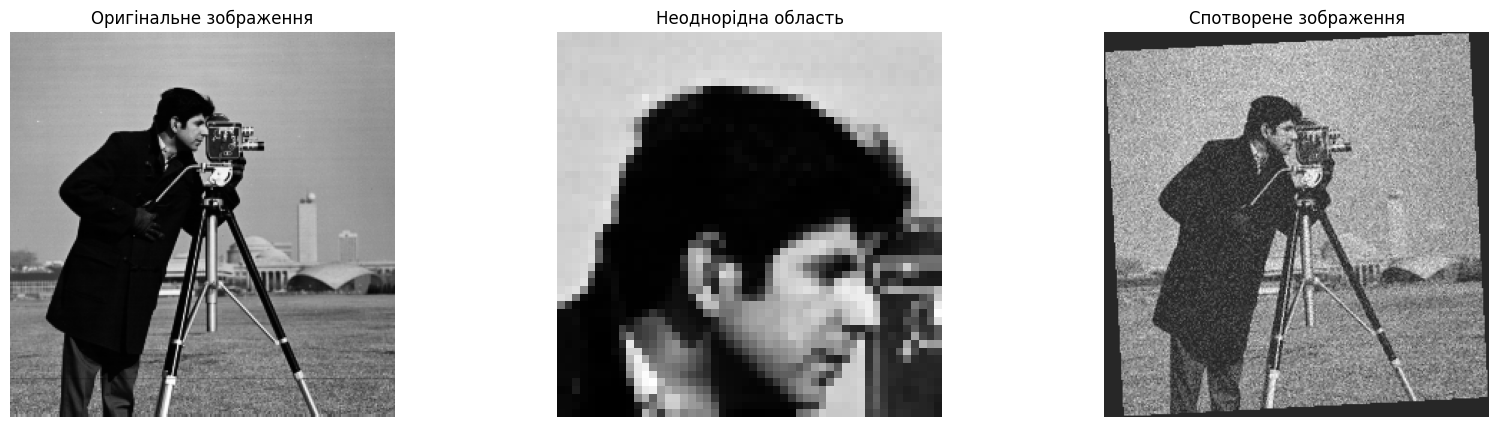

In [25]:
image = imread("cameraman.tif")

clip_image = image[30:80, 90:140]

noise_image = skimage.util.random_noise(image, mode="gaussian")*255

# (h, w) = noise_image.shape[:2]
# (cX, cY) = (w // 2, h // 2)
# # rotate our image by 45 degrees around the center of the image
# M = cv.getRotationMatrix2D((cX, cY), 3, 1.0)
# rotate_image = cv.warpAffine(noise_image, M, (w, h))
# # cv.imshow("Rotated by 45 Degrees", rotate_image)

rotate_image = ndimage.rotate(noise_image, 3)

print(noise_image,rotate_image)

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.axis("off")
plt.title("Оригінальне зображення")
plt.imshow(image, cmap="gray")

plt.subplot(1,3,2)
plt.axis("off")
plt.title("Неоднорідна область")
plt.imshow(clip_image, cmap="gray")

plt.subplot(1,3,3)
plt.axis("off")
plt.title("Спотворене зображення")
plt.imshow(rotate_image, cmap="gray")

plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


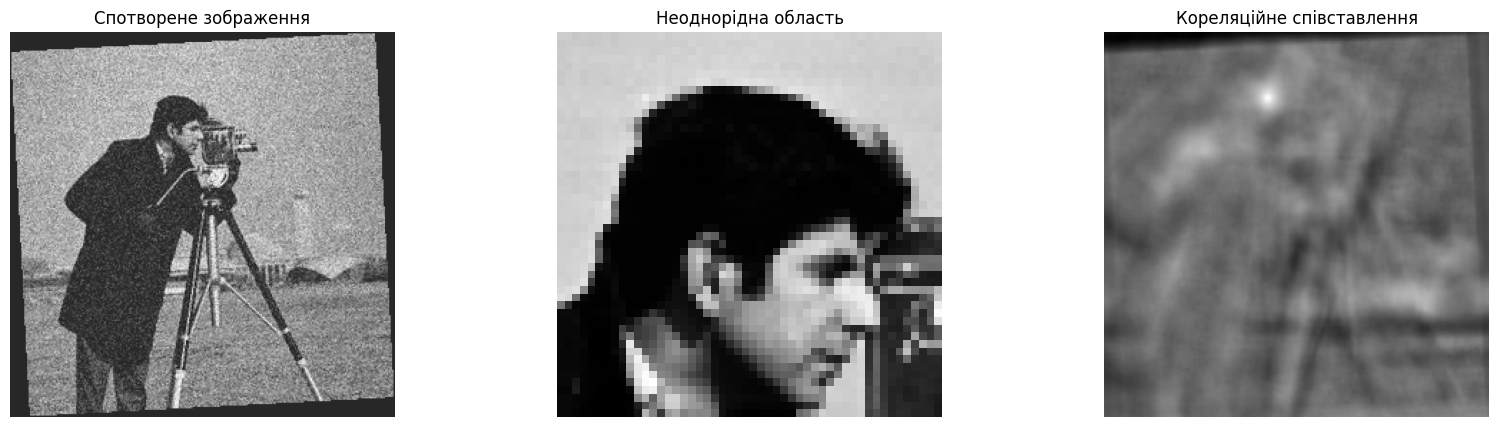

In [26]:
correlation_image = cv.matchTemplate(rotate_image.astype(np.uint8), clip_image, method=cv.TM_CCOEFF_NORMED)
print(rotate_image)

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.axis("off")
plt.title("Спотворене зображення")
plt.imshow(rotate_image, cmap="gray")

plt.subplot(1,3,2)
plt.axis("off")
plt.title("Неоднорідна область")
plt.imshow(clip_image, cmap="gray")

plt.subplot(1,3,3)
plt.axis("off")
plt.title("Кореляційне співставлення")
plt.imshow(correlation_image, cmap="gray")

plt.show()

## Згорткова нейронна мережа

In [46]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))

In [49]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    x_train, 
    y_train, 
    epochs=10, 
    validation_data=(x_test, y_test)
) 

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)  

print(test_acc)

Epoch 1/10
1875/1875 [==============================] - 53s 27ms/step - loss: 0.2376 - accuracy: 0.9451 - val_loss: 0.0583 - val_accuracy: 0.9825
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.0538 - val_accuracy: 0.9820
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0516 - accuracy: 0.9846 - val_loss: 0.0572 - val_accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0370 - val_accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0448 - val_accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0422 - val_accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0289 - accuracy: 0.9912 - val_loss: 0.0436 -

In [50]:
x_test, y_test = x_test[50:58], y_test[50:58]

In [51]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)  

print(test_acc)

1/1 - 0s - loss: 2.9802e-08 - accuracy: 1.0000 - 28ms/epoch - 28ms/step
1.0


In [55]:
y_hat_list = model.predict(x_test)
y_hat = []
for i in range(len(y_hat_list)):
    y_hat.append(np.argmax(y_hat_list[i])) 

print("y_test:", y_test)
print("y_hat :", np.array(y_hat))

1/1 [==============================] - 0s 27ms/step
y_test: [6 3 5 5 6 0 4 1]
y_hat : [6 3 5 5 6 0 4 1]


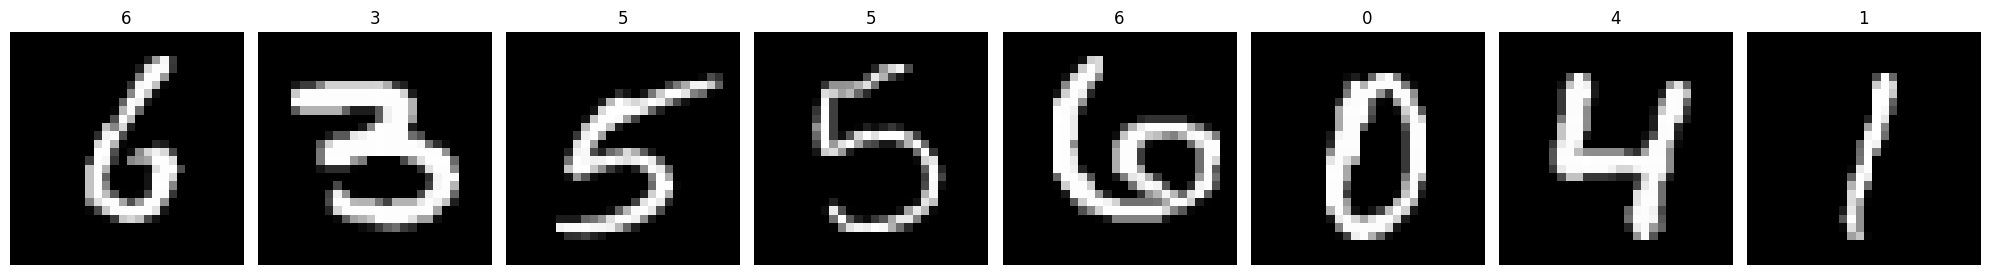

In [56]:
plt.figure(figsize=(20,5))

for i in range(8):
    plt.subplot(1,8,i+1)
    plt.title(y_hat[i])
    plt.axis("off")
    plt.tight_layout()
    plt.imshow(x_test[i],cmap="gray")
    
plt.show()